<a href="https://colab.research.google.com/github/Ssurf777/VAEforPointCloud/blob/main/read_stl_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install POT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 27.3 MB/s eta 0:00:00


In [2]:
import requests
import os

def download_file(url, local_filename):
    """Downloads a file from a URL to a local file."""
    print(f"Downloading {url}...")
    try:
        with requests.get(url, stream=True) as r:
            r.raise_for_status()
            with open(local_filename, 'wb') as f:
                for chunk in r.iter_content(chunk_size=4096):  # Smaller chunk size
                    f.write(chunk)
        print(f"{local_filename} downloaded successfully.")
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {local_filename}: {e}")

# URLs for downloading
urls = {
    "utils.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/utils.py",
    "file_io.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/file_io.py",
    "point_cloud.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/point_cloud.py",
    "sampling.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/sampling.py",
    "ISAB_VQVAE.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/ISAB_VQVAE.py",
    "ISAB.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/ISAB.py",
    "ChamferDis.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/ChamferDis.py",
    "EarthMoversDis.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/EarthMoversDis.py",
    "train.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/train.py",
    "visualize_loss.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/visualize_loss.py",
    "Dataloader.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/Dataloader.py",
}

# Download each file
for local_filename, url in urls.items():
    download_file(url, local_filename)


utils.py downloaded successfully.
file_io.py downloaded successfully.
point_cloud.py downloaded successfully.
sampling.py downloaded successfully.
ISAB_VQVAE.py downloaded successfully.
ISAB.py downloaded successfully.
ChamferDis.py downloaded successfully.
EarthMoversDis.py downloaded successfully.
train.py downloaded successfully.
visualize_loss.py downloaded successfully.
Dataloader.py downloaded successfully.


In [3]:

# Import downloaded modules
import utils
import file_io
import point_cloud
import sampling
import ISAB_VQVAE
import ISAB
import ChamferDis
import EarthMoversDis
import train
import Dataloader
import visualize_loss
from utils import get_available_memory
from file_io import read_off
from point_cloud import pcshow
from sampling import PointSampler
from ISAB_VQVAE import ISAB_VQVAE
from ISAB import ISAB
from ChamferDis import chamfer_distance
from EarthMoversDis import emd_distance
from train import train
from visualize_loss import visualize_loss
from Dataloader import prepare_data_for_ISAB
from Dataloader import prepare_data_from_stl

available_memory_gb = get_available_memory()
print(f"Available memory: {available_memory_gb:.2f} GB")

Available memory: 10.97 GB


In [11]:
import torch
import torch.optim as optim
import numpy as np
import torch.nn.functional as F



device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_points =50000
# データ準備
file_names = [f"/content/drive/MyDrive/chair/sample_STL/Eiffel_tower_sample.STL"]
data_loader = prepare_data_from_stl(file_names, num_points=num_points, device=device)
print(len(data_loader))

# VAEモデル構築
#vae = ISAB_VQVAE(num_points=5000, dim_input=3, dim_hidden=128, num_heads=4, num_inds=32,embedding_dim=3, num_embeddings=32).to(device)
#optimizer = optim.Adam(vae.parameters(), lr=1.0e-4)

1


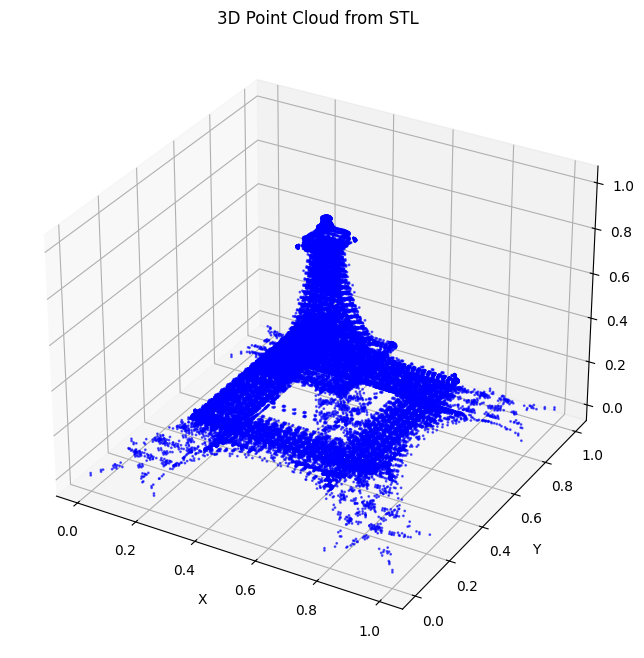

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

# DataLoaderから1バッチ取得（batch_size=1なので1個）
for batch in data_loader:
    points = batch[0].squeeze(0)  # (1, 5000, 3) → (5000, 3)
    points = points.cpu().numpy()  # NumPy形式に変換
    break  # 1個だけ表示するならbreak

# プロット
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, c='b', alpha=0.6)
ax.set_title("3D Point Cloud from STL")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


# バイナリSTLの取り扱い

In [10]:
!pip install numpy-stl

In [18]:
from stl import mesh, Mode  # Modeを明示的にインポート

# バイナリSTLを読み込む
your_mesh = mesh.Mesh.from_file("/content/drive/MyDrive/chair/sample_STL/Stanford_Bunny_sample.stl")

# ASCII STLで保存する
your_mesh.save("/content/drive/MyDrive/chair/sample_STL/Stanford_Bunny_sample2.stl", mode=Mode.ASCII)


In [19]:
import torch
import torch.optim as optim
import numpy as np
import torch.nn.functional as F



device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_points =50000
# データ準備
file_names = [f"/content/drive/MyDrive/chair/sample_STL/Stanford_Bunny_sample2.stl"]
data_loader = prepare_data_from_stl(file_names, num_points=num_points, device=device)
print(len(data_loader))

1


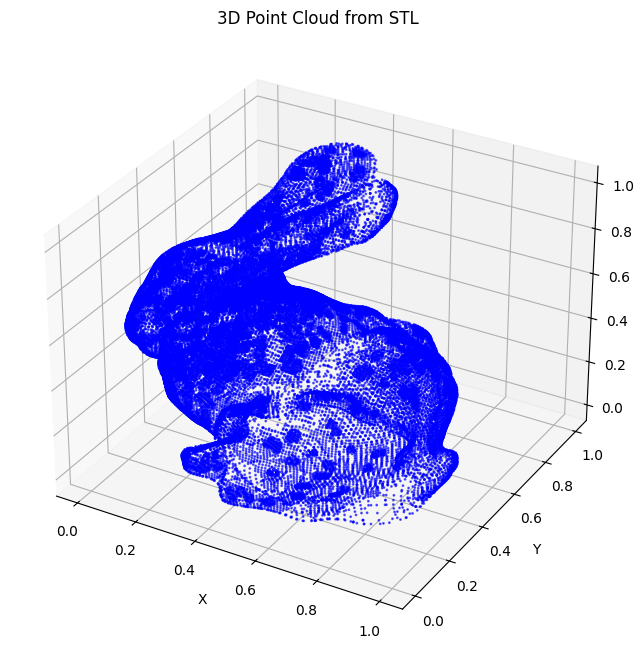

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

# DataLoaderから1バッチ取得（batch_size=1なので1個）
for batch in data_loader:
    points = batch[0].squeeze(0)  # (1, 5000, 3) → (5000, 3)
    points = points.cpu().numpy()  # NumPy形式に変換
    break  # 1個だけ表示するならbreak

# プロット
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, c='b', alpha=0.6)
ax.set_title("3D Point Cloud from STL")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()